Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.    Train a simple classifier (e.g. any simple classifier in scikit) to recognize the MNIST digits using as inputs their encoding obtained at step 2. Use the standard training/test split. Show a performance metric of your choice in the presentation/handout.

In [24]:
import keras
import tensorflow
import matplotlib.pyplot as plt
import numpy as np

In [5]:

from keras.datasets import mnist

(Xtr, ytr), (Xts, yts) = mnist.load_data()
     

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [61]:
print(Xtr.shape)
print(ytr.shape)
print(Xts.shape)
print(yts.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [62]:
print(ytr[1])

0


In [29]:
first_image = Xtr[1,:,:]
first_image.shape


(28, 28)

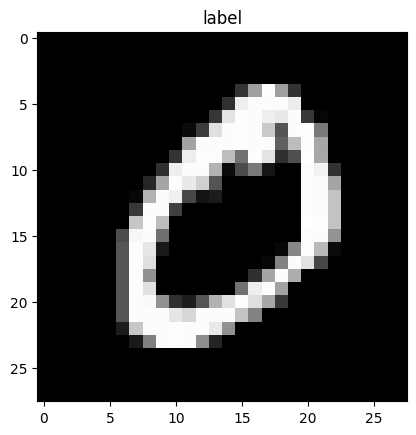

In [30]:
plt.title('label')
plt.imshow(first_image, cmap='gray')
plt.show()


In [ ]:
import numpy as np


def logistic(x):  # logistic function to be used in the RBM computations
    return 1.0 / (1 + np.exp(-x))
  

class RBM:  # definition of the Restricted Boltzmann Machine
    def __init__(self, hidden_units, visible_units):  # initialization
        self.nh = hidden_units  # hidden units of the RBM
        self.nv = visible_units  # visible units of the RBM
        self.weights = np.random.uniform(-1/self.nv, 1/self.nv, (self.nv, self.nh))  # random initialization for the weights
        self.bias_h = np.zeros(self.nh)  # bias initialized to zero for each hidden unit
        self.bias_v = np.zeros(self.nv)  # bias initialized to zero for each visible unit
        print("Built a RBM with " + str(self.nv) + " visible units and " + str(self.nh) + " hidden units")


    def train(self, Xtr, epochs = 100, learning_rate = 0.1):  # CD-1 training algorithm
        n = 6000  # batch size

        print("Training on " + str(n) + " random elements for " + str(epochs) + " epochs")
        for epoch in range(epochs):
            # Clamp data
            idx = np.random.uniform(low = 0, high = Xtr.shape[0], size=n).astype(int)
            cXtr = Xtr[idx,:]

            # Wake phase
            # Hidden probability
            h_prob = logistic(np.dot(cXtr, self.weights) + self.bias_h)
            wake = np.dot(cXtr.T, h_prob)

            # Dream phase
            # Hidden states
            h_state = h_prob > np.random.rand(n, self.nh)
            # Reconstruction probability
            reconstruction_data_prob = logistic(np.dot(h_state, self.weights.T) + self.bias_v)
            # Reconstructed data
            reconstruction_data = reconstruction_data_prob > np.random.rand(n, self.nv)
            h_neg_prob = logistic(np.dot(reconstruction_data, self.weights) + self.bias_h)
            dream = np.dot(reconstruction_data.T, h_neg_prob)

            # Learning phase
            error = np.sum((cXtr - reconstruction_data)**2)/n
            dW = (wake - dream)/n
            dBh = (np.sum(h_prob) - np.sum(h_neg_prob))/n
            dBv = (np.sum(cXtr) - np.sum(reconstruction_data))/n
            self.weights += learning_rate*dW
            self.bias_h += learning_rate*dBh
            self.bias_v += learning_rate*dBv
            print("\rError:\t" + "{:.5f}".format(error), end="")
        print("")


    def get_hidden_activations(self, Xtr):  # for the inference process
        n = Xtr.shape[0]

        print("Computing hidden activations for " + str(n) + " elements")
        h_states = np.ones((n, self.nh))

        h_prob = logistic(np.dot(Xtr, self.weights) + self.bias_h)
        h_states[:,:] = h_prob > np.random.rand(n, self.nh)
        return h_states